# Data Preprocessing
This file contains the script used for Pre-Processing the data using the R language

## Importing Libraries

In [10]:

if(!require(tidyverse)) install.packages('tidyverse')
if(!require(corrplot)) install.packages('corrplot')

Loading required package: corrplot

corrplot 0.90 loaded



## Importing the data

In [3]:
df = read.csv('Higg.csv')
colnames(df)[1] <- 'output'
names(df)

[1] "output"                   "lepton_pT"               
 [3] "lepton_eta"               "lepton_phi"              
 [5] "missing_energy_magnitude" "missing_energy_phi"      
 [7] "jet1pt"                   "jet1eta"                 
 [9] "jet1phi"                  "jet1b.tag"               
[11] "jet2pt"                   "jet2eta"                 
[13] "jet2phi"                  "jet2b.tag"               
[15] "jet3pt"                   "jet3eta"                 
[17] "jet3phi"                  "jet3b.tag"               
[19] "jet4pt"                   "jet4eta"                 
[21] "jet4phi"                  "jet4b.tag"               
[23] "m_jj"                     "m_jjj"                   
[25] "m_lv"                     "m_jlv"                   
[27] "m_bb"                     "m_wbb"                   
[29] "m_wwbb"

## Check missing value

In [4]:
apply(is.na(df), 2, sum)

output                lepton_pT               lepton_eta 
                       0                        0                        0 
              lepton_phi missing_energy_magnitude       missing_energy_phi 
                       0                        0                        0 
                  jet1pt                  jet1eta                  jet1phi 
                       0                        0                        0 
               jet1b.tag                   jet2pt                  jet2eta 
                       0                        0                        0 
                 jet2phi                jet2b.tag                   jet3pt 
                       1                        1                        1 
                 jet3eta                  jet3phi                jet3b.tag 
                       1                        1                        1 
                  jet4pt                  jet4eta                  jet4phi 
                       1                        1                        1 
               jet4b.tag                     m_jj                    m_jjj 
                       1                        1                        1 
                    m_lv                    m_jlv                     m_bb 
                       1                        1                        1 
                   m_wbb                   m_wwbb 
                       1                        1

## check the data structure

In [5]:
str(df)

'data.frame':	63349 obs. of  29 variables:
 $ output                  : int  1 1 0 1 0 1 1 1 1 1 ...
 $ lepton_pT               : num  0.908 0.799 1.344 1.105 1.596 ...
 $ lepton_eta              : num  0.329 1.471 -0.877 0.321 -0.608 ...
 $ lepton_phi              : num  0.35941 -1.63597 0.93591 1.5224 0.00707 ...
 $ missing_energy_magnitude: num  1.498 0.454 1.992 0.883 1.818 ...
 $ missing_energy_phi      : num  -0.313 0.426 0.882 -1.205 -0.112 ...
 $ jet1pt                  : num  1.096 1.105 1.786 0.681 0.848 ...
 $ jet1eta                 : num  -0.558 1.282 -1.647 -1.07 -0.566 ...
 $ jet1phi                 : num  -1.588 1.382 -0.942 -0.922 1.581 ...
 $ jet1b.tag               : num  2.17 0 0 0 2.17 ...
 $ jet2pt                  : num  0.813 0.852 2.423 0.801 0.755 ...
 $ jet2eta                 : num  -0.214 1.541 -0.676 1.021 0.643 ...
 $ jet2phi                 : num  1.271 -0.82 0.736 0.971 1.426 ...
 $ jet2b.tag               : num  2.21 2.21 2.21 2.21 0 ...
 $ jet3pt     

## check output composition

In [6]:
prop.table(table(df$output))


        0         1 
0.4688472 0.5311528 

## Check and remove outliers

In [7]:
df2 = as.data.frame(scale(df[, - which(names(df)=='output')], center = TRUE, scale = TRUE))
summary(df2)[c(4),]

lepton_pT               lepton_eta               lepton_phi 
     "Mean   : 0.0000  "    "Mean   : 0.000000  "    "Mean   : 0.000000  " 
missing_energy_magnitude       missing_energy_phi                   jet1pt 
     "Mean   : 0.0000  "    "Mean   : 0.000000  "      "Mean   : 0.0000  " 
                 jet1eta                  jet1phi                jet1b.tag 
  "Mean   : 0.0000000  "    "Mean   : 0.000000  "     "Mean   : 0.00000  " 
                  jet2pt                  jet2eta                  jet2phi 
     "Mean   : 0.0000  "    "Mean   : 0.000000  "    "Mean   : 0.000000  " 
               jet2b.tag                   jet3pt                  jet3eta 
    "Mean   : 0.00000  "      "Mean   : 0.0000  "    "Mean   : 0.000000  " 
                 jet3phi                jet3b.tag                   jet4pt 
   "Mean   : 0.000000  "      "Mean   : 0.0000  "      "Mean   : 0.0000  " 
                 jet4eta                  jet4phi                jet4b.tag 
   "Mean   : 0.000000  "    "Mean   : 0.000000  "      "Mean   : 0.0000  " 
                    m_jj                    m_jjj                     m_lv 
    "Mean   : 0.00000  "      "Mean   : 0.0000  "      "Mean   : 0.0000  " 
                   m_jlv                     m_bb                    m_wbb 
     "Mean   : 0.0000  "      "Mean   : 0.0000  "      "Mean   : 0.0000  " 
                  m_wwbb 
     "Mean   : 0.0000  "

## Removing Outlier using Z-score

In [8]:
df3 = abs(df2)
df3 <- cbind (df3, df$output)
df4 <- filter_all(df3,all_vars(.<4))
print('number of row removed:')
print(dim(df)-dim(df4))

[1] "number of row removed:"
[1] 4164    0


## Check and remove highly correlated data

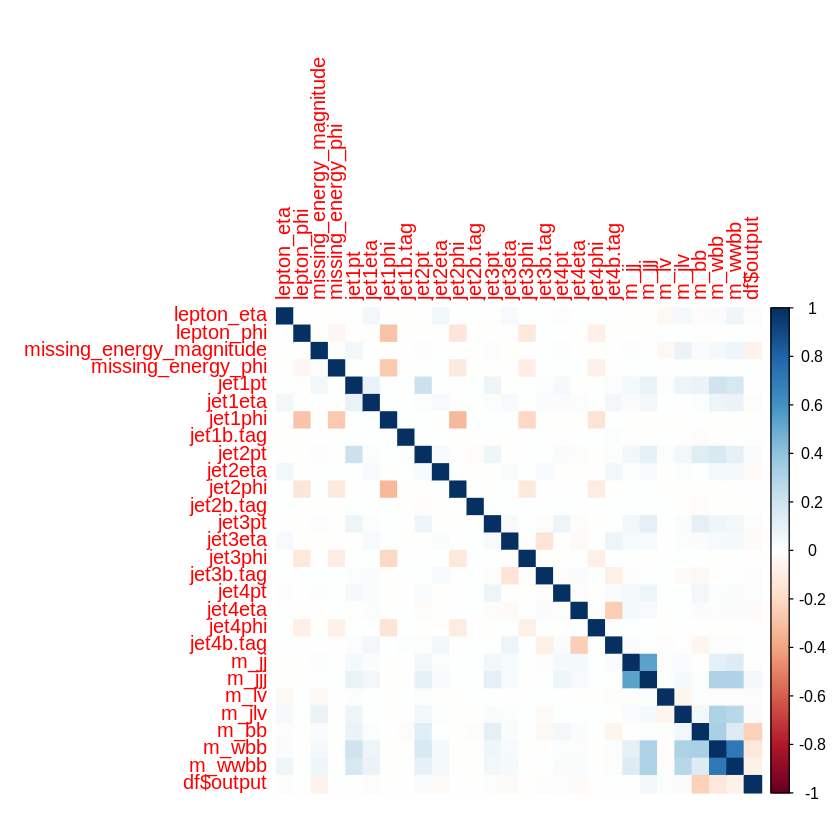

In [11]:
cortab <- cor(df4[, -which(names(df)=='output')])
corrplot(cortab, method = 'color')

## Train/Test/OOS Split
The data set will be splited into 2:
1.	Dataset with outliers remove.
2.	Dataset with outliers remain.

## Dataset, keep outliers

In [12]:
set.seed(42)
temp <- sample(1:3,size=nrow(df),replace=TRUE,prob=c(0.7,0.15,0.15))
train_keep_outlier <- df[temp==1,]
test_keep_outlier <- df[temp==2,]
oos_keep_outlier <- df[temp==3,]
write.csv(train_keep_outlier,"train_keep_outlier.csv", row.names = FALSE)
write.csv(test_keep_outlier,"test_keep_outlier.csv", row.names = FALSE)
write.csv(oos_keep_outlier,"oos_keep_outlier.csv", row.names = FALSE)

## Dataset, remove outliers

In [13]:
temp <- sample(1:3,size=nrow(df4),replace=TRUE,prob=c(0.7,0.15,0.15))
train_remove_outlier <- df4[temp==1,]
test_remove_outlier <- df4[temp==2,]
oos_remove_outlier <- df4[temp==3,]
write.csv(train_remove_outlier,"train_remove_outlier.csv", row.names = FALSE)
write.csv(test_remove_outlier,"test_remove_outlier.csv", row.names = FALSE)
write.csv(oos_remove_outlier,"oos_remove_outlier.csv", row.names = FALSE)